In [ ]:
!pip install fcapy==0.1.4.1
!pip install frozendict sparselinear bitsets
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git


In [ ]:
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


In [4]:
file_path = 'income-data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Column Description

* age: Age of the individual.
* workclass: Employment sector of the individual.
* fnlwgt: Final weight indicating the number of people in the population represented by the sample.
* education: Education level attained.
* educational-num: Numeric representation of education level.
* marital-status: Marital status.
* occupation: Type of work performed.
* relationship: Family relationship role.
* race: Race of the individual.
* gender: Gender of the individual.
* capital-gain: Income from investment sources, apart from salary.
* capital-loss: Loss from investment sources.
* hours-per-week: Hours worked per week.
* native-country: Country of origin.
* (Y) -> income: Income category (<=50K or >50K).

In [6]:
# Check for missing values or placeholders like '?'
missing_values = df.isin(['?']).sum()

# Replace '?' with NaN for cleaner handling of missing values
df.replace('?', pd.NA, inplace=True)

# Summarize data after initial cleaning
summary = {
    "Total Rows": len(df),
    "Missing Values Per Column": missing_values,
    "Unique Values Per Column": df.nunique()
}

summary_df = pd.DataFrame(summary)

In [7]:
summary_df

,Total Rows,Missing Values Per Column,Unique Values Per Column
age,48842,0,74
workclass,48842,2799,8
fnlwgt,48842,0,28523
education,48842,0,16
educational-num,48842,0,16
marital-status,48842,0,7
occupation,48842,2809,14
relationship,48842,0,6
race,48842,0,5
gender,48842,0,2


In [8]:
df.replace('?', np.nan, inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,<NA>,103497,Some-college,10,Never-married,<NA>,Own-child,White,Female,0,0,30,United-States,<=50K


### Checking the percentage of Missing Values

In [9]:
df.isnull().sum() / df.shape[0]*100

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

As the percentage of Null values is less than 5%

In [10]:
df.dropna(inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


Checking duplicates

In [12]:
df.duplicated().sum()

np.int64(47)

In [13]:
df.drop_duplicates(inplace= True)

Dropping the columns which have no relation on Y variable

In [14]:
df.drop(columns = ['capital-gain','capital-loss'], inplace= True)

<Figure size 1200x600 with 0 Axes>

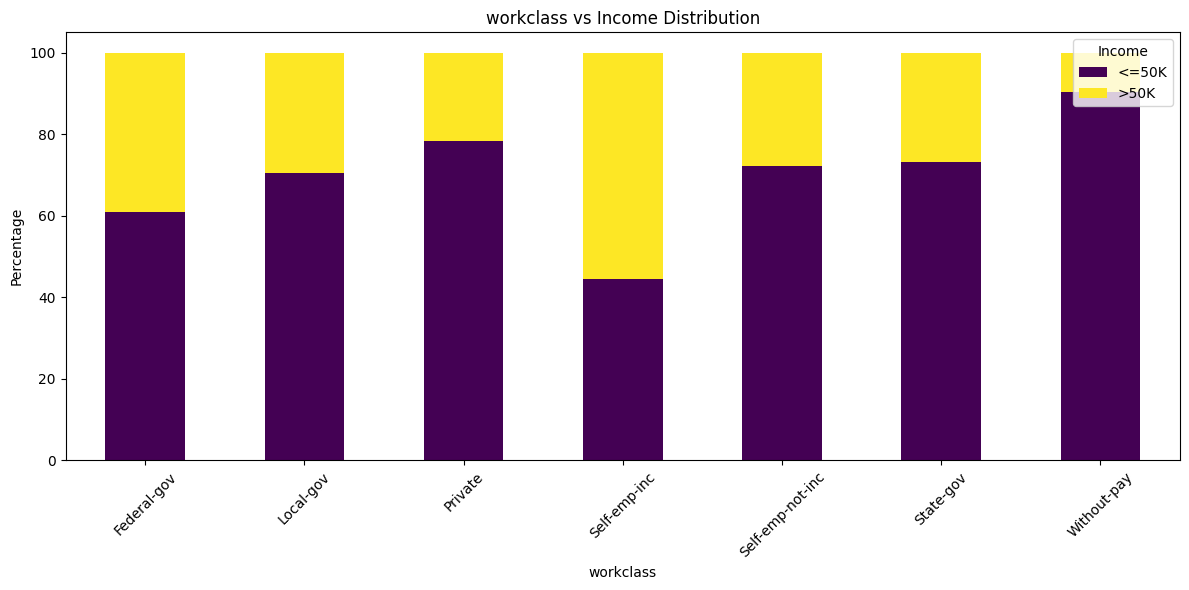

<Figure size 1200x600 with 0 Axes>

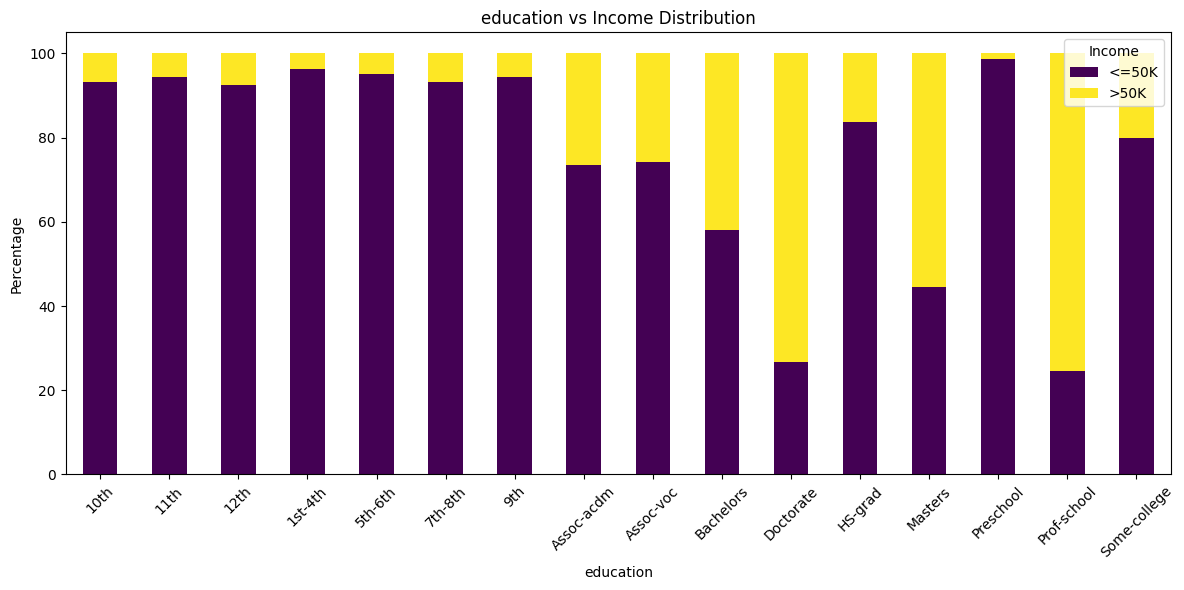

<Figure size 1200x600 with 0 Axes>

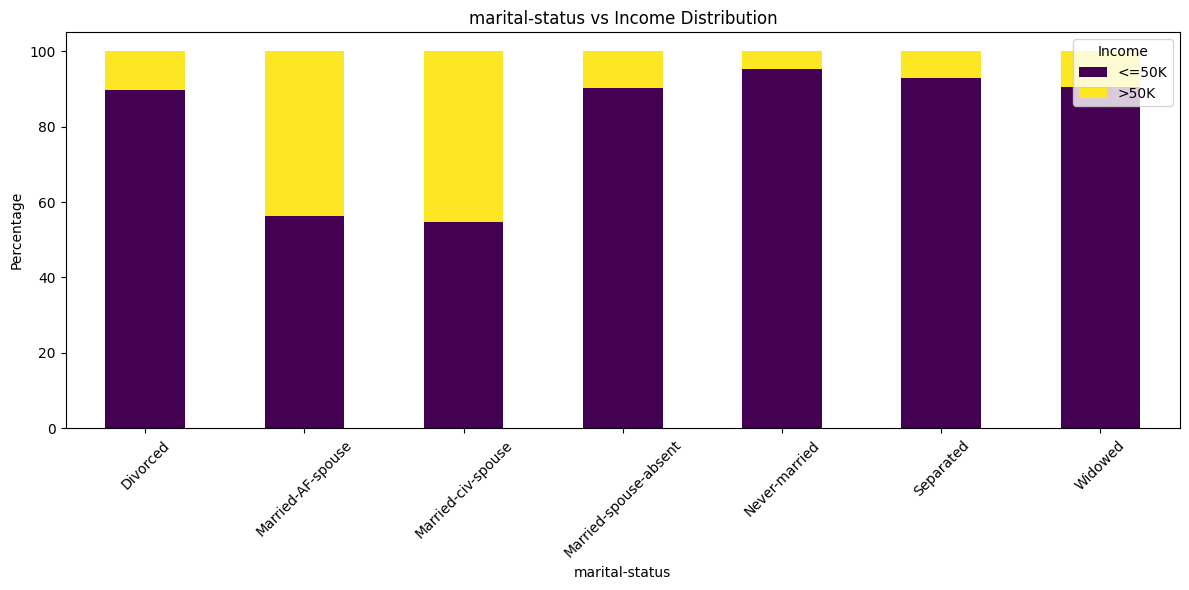

<Figure size 1200x600 with 0 Axes>

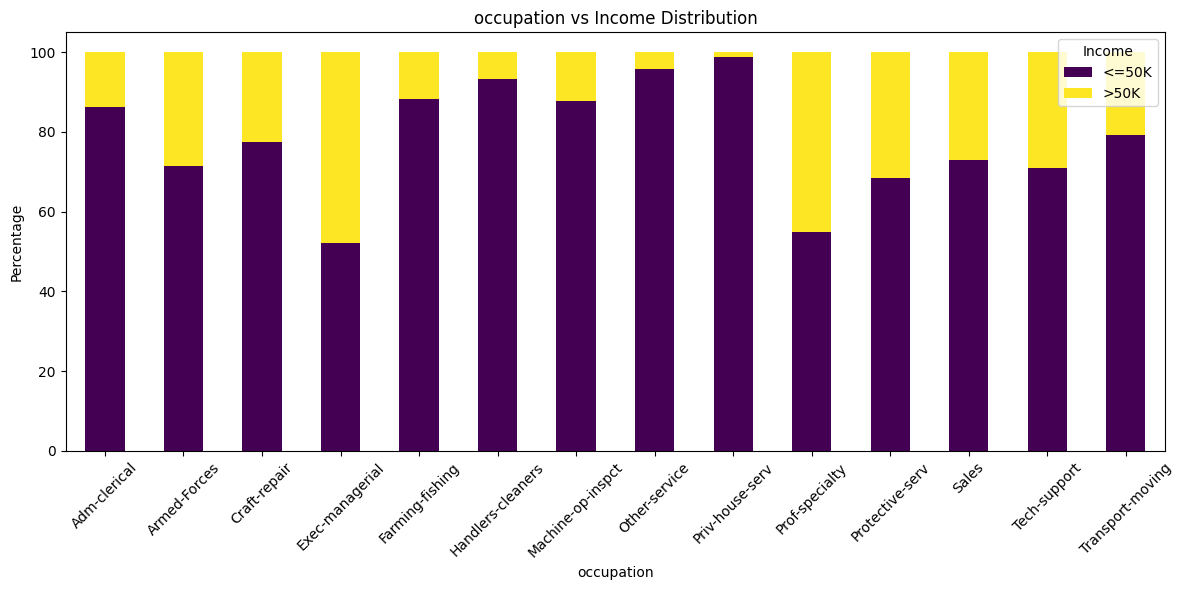

<Figure size 1200x600 with 0 Axes>

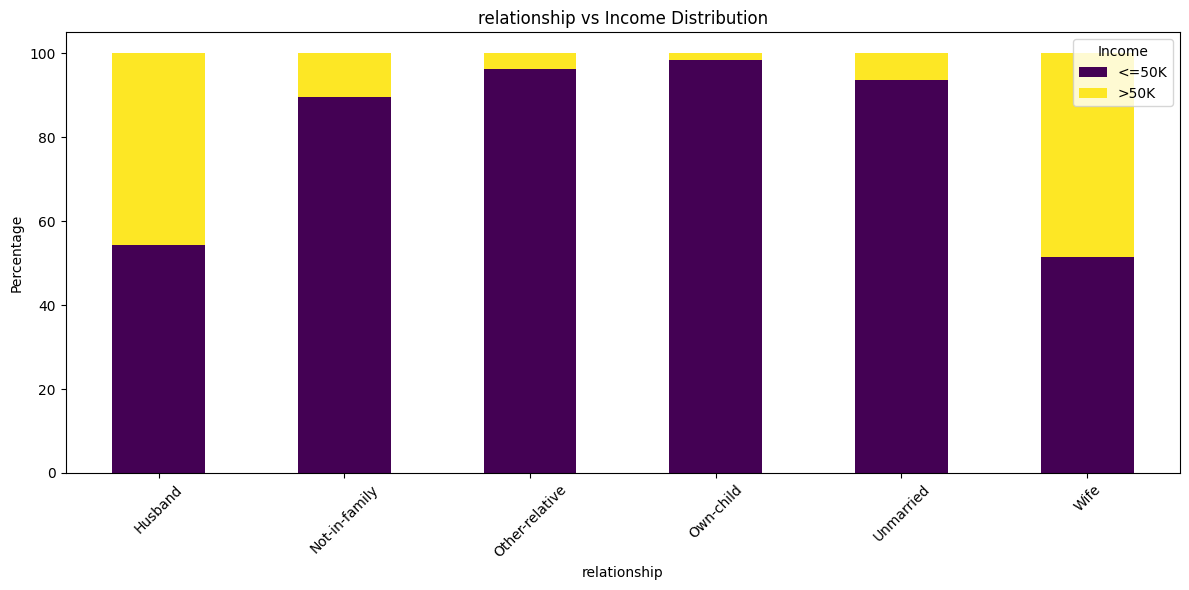

<Figure size 1200x600 with 0 Axes>

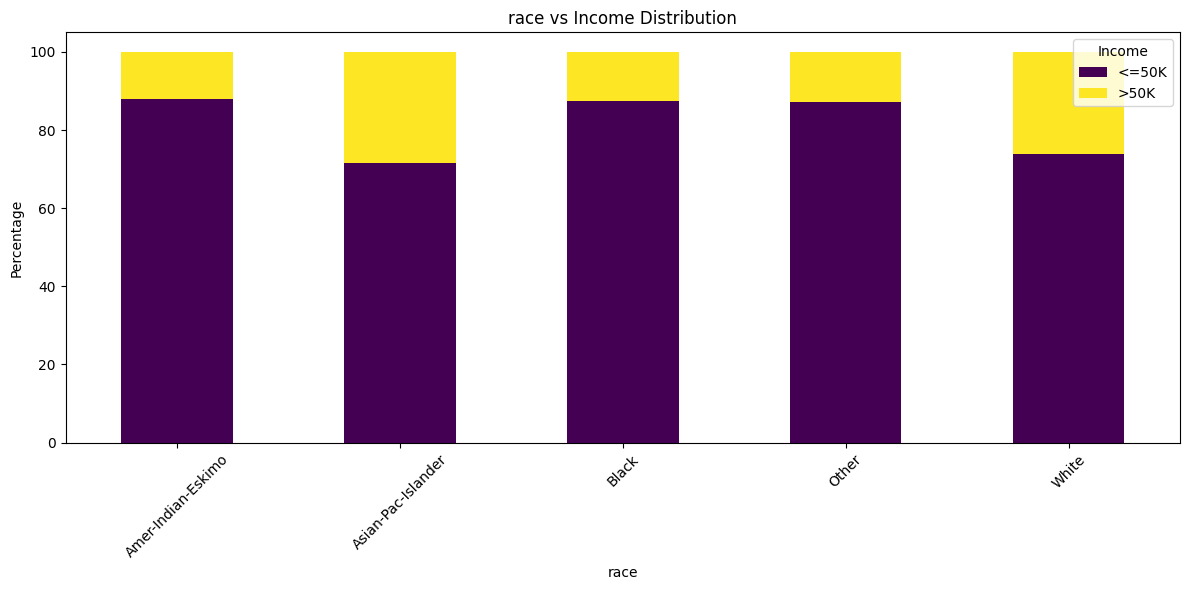

<Figure size 1200x600 with 0 Axes>

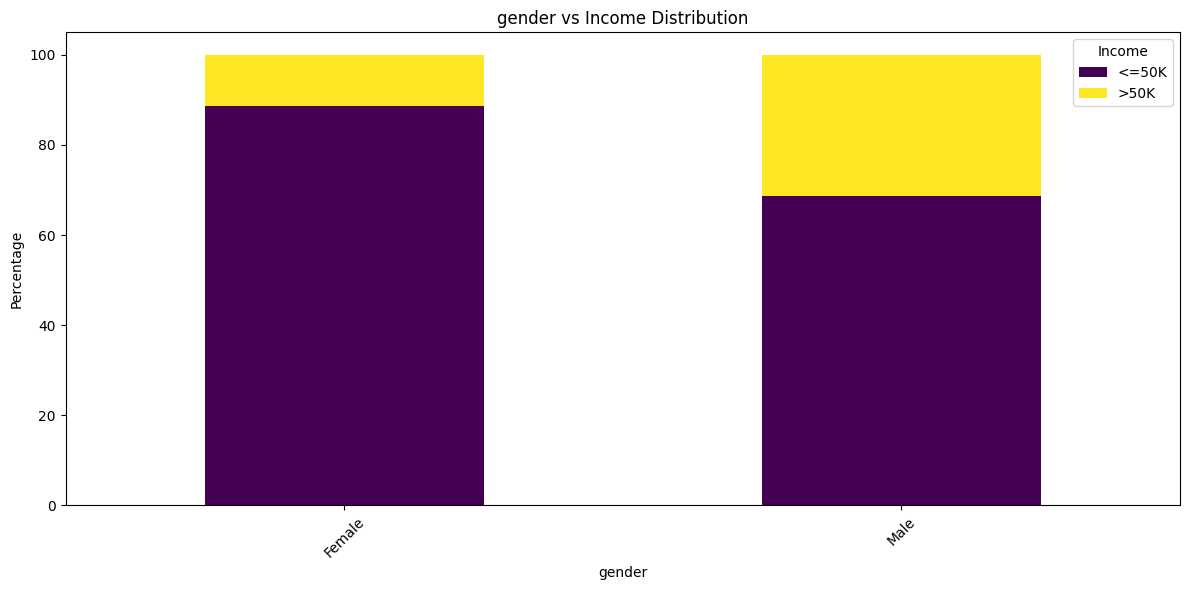

<Figure size 1200x600 with 0 Axes>

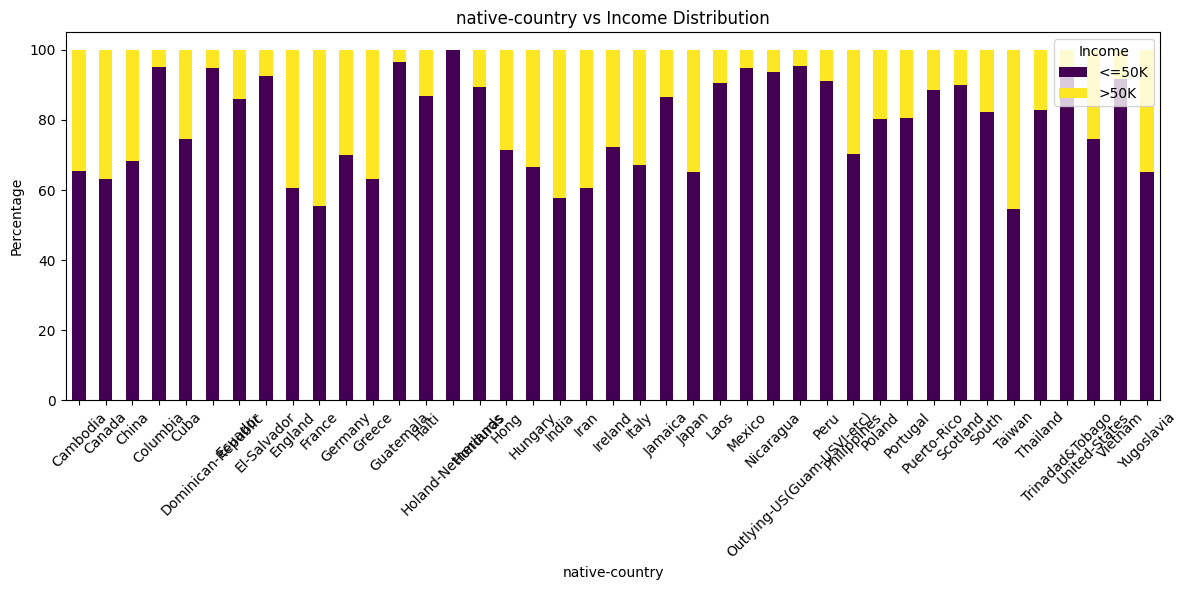

/tmp/ipykernel_18943/4157181247.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income', y=col, palette='Set2')


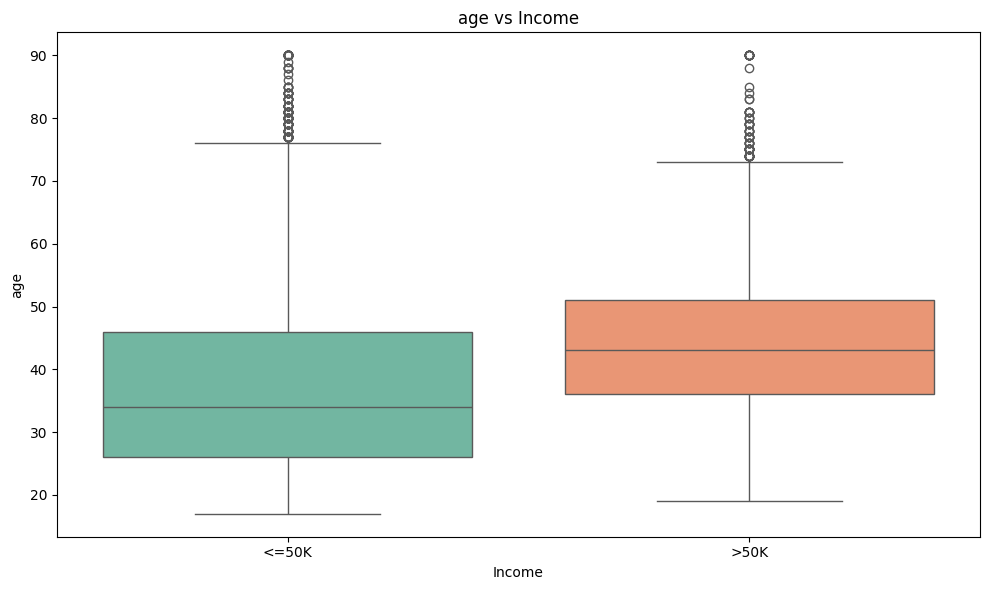

/tmp/ipykernel_18943/4157181247.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income', y=col, palette='Set2')


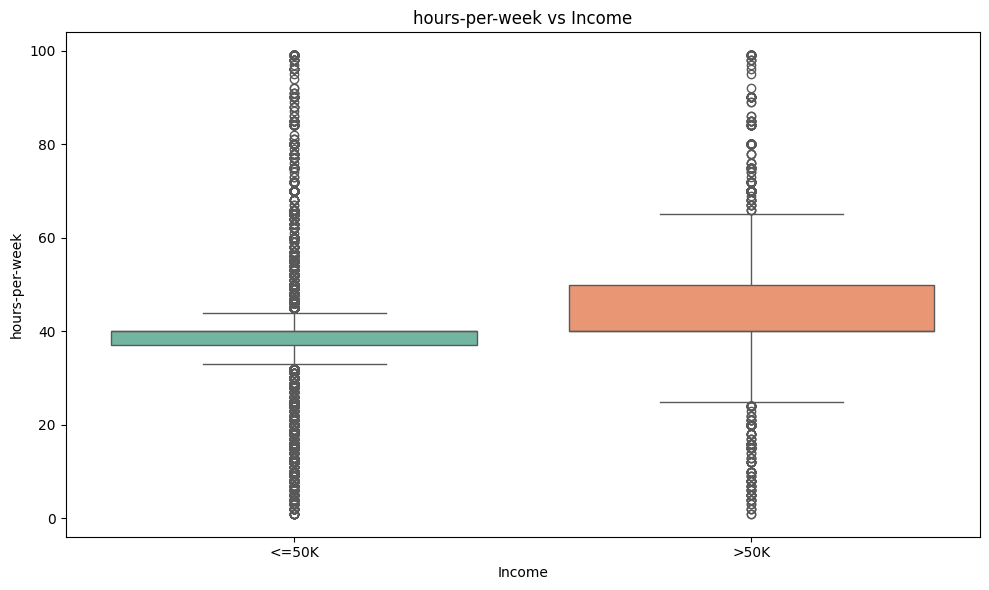

{'workclass': income                <=50K       >50K
 workclass                             
 Federal-gov       60.953058  39.046942
 Local-gov         70.483871  29.516129
 Private           78.218387  21.781613
 Self-emp-inc      44.559271  55.440729
 Self-emp-not-inc  72.094862  27.905138
 State-gov         73.278520  26.721480
 Without-pay       90.476190   9.523810,
 'education': income            <=50K       >50K
 education                         
 10th          93.295176   6.704824
 11th          94.502779   5.497221
 12th          92.521739   7.478261
 1st-4th       96.363636   3.636364
 5th-6th       95.078300   4.921700
 7th-8th       93.309002   6.690998
 9th           94.378698   5.621302
 Assoc-acdm    73.589914  26.410086
 Assoc-voc     74.259448  25.740552
 Bachelors     57.983860  42.016140
 Doctorate     26.654412  73.345588
 HS-grad       83.656060  16.343940
 Masters       44.568245  55.431755
 Preschool     98.571429   1.428571
 Prof-school   24.585987  75.414013
 

In [26]:
# Relationship of categorical features with the target variable 'income'
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

categorical_relationships = {}

for col in categorical_cols:
    # Count distribution of income for each category in the column
    relationship = df.groupby([col, 'income']).size().unstack()
    relationship_percentage = relationship.div(relationship.sum(axis=1), axis=0) * 100
    categorical_relationships[col] = relationship_percentage

    # Plot the relationship
    plt.figure(figsize=(12, 6))
    relationship_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
    plt.title(f'{col} vs Income Distribution')
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(title='Income', loc='upper right')
    plt.tight_layout()
    plt.show()

# Relationship of numerical features with the target variable 'income'
numerical_cols = ['age', 'hours-per-week']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='income', y=col, palette='Set2')
    plt.title(f'{col} vs Income')
    plt.xlabel('Income')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Return a summary of categorical relationships
categorical_relationships


In [27]:
df.shape

(45175, 13)

In [28]:
# Preprocessing
# Encode the target variable
label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])

# Separate features and target
X = df.drop('income', axis=1)
y = df['income']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

accuracy, roc_auc, report


(0.8173098207039032,
 np.float64(0.8654622091896287),
 '              precision    recall  f1-score   support\n\n       <=50K       0.86      0.91      0.88     10192\n        >50K       0.66      0.55      0.60      3361\n\n    accuracy                           0.82     13553\n   macro avg       0.76      0.73      0.74     13553\nweighted avg       0.81      0.82      0.81     13553\n')

In [29]:
#  Parse the classification report into a DataFrame
report_dict = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

In [30]:
# Transform the dictionary into a pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Reset index for better readability
report_df.reset_index(inplace=True)
report_df.rename(columns={'index': 'Metric'}, inplace=True)

# Display the formatted table
report_df

,Metric,precision,recall,f1-score,support
0,<=50K,0.858951,0.905808,0.881757,10192.00000
1,>50K,0.657754,0.548944,0.598443,3361.00000
2,accuracy,0.817310,0.817310,0.817310,0.81731
3,macro avg,0.758352,0.727376,0.740100,13553.00000
4,weighted avg,0.809056,0.817310,0.811498,13553.00000


**Performance on <=50K Class:**

The model performs well for the majority class (<=50K) with high precision (85.9%) and recall (90.6%), resulting in a strong F1-score (88.2%).

**Performance on >50K Class:**

For the minority class (>50K), the model struggles slightly, with a precision of 65.8% and recall of 54.9%. This indicates some difficulty in identifying
higher-income individuals.

# **Applying Binarization for Neural FCA**

In [51]:
df = pd.read_csv(file_path)

In [56]:
# Replace '?' with NaN for proper cleaning
data_cleaned = data_cleaned.replace('?', pd.NA)

# Remove rows with any missing values (including replaced '?')
data_cleaned = data_cleaned.dropna()
X.drop(columns = ['capital-gain','capital-loss'], inplace= True)
# Separate X and Y again after cleaning
X = data_cleaned.drop(columns=['income'])
Y = data_cleaned['income']

# Display the updated shapes of X and Y
X.shape, Y.shape

((45175, 14), (45175,))

# Finding Unique values in each Column

In [67]:
# Count unique values for each column in X
unique_values_count = X.nunique()

# Display the unique values count for each column
unique_values_count

,0
age,74
workclass,7
fnlwgt,26741
education,16
educational-num,16
marital-status,7
occupation,14
relationship,6
race,5
gender,2


In [70]:
# Create a dataframe to store the unique values for each column
unique_values_df = pd.DataFrame({
    'Column': X.columns,
    'Unique Values': [X[col].unique().tolist() for col in X.columns]
})

In [71]:
unique_values_df

,Column,Unique Values
0,age,"[25, 38, 28, 44, 34, 63, 24, 55, 65, 36, 26, 4..."
1,workclass,"[Private, Local-gov, Self-emp-not-inc, Federal..."
2,fnlwgt,"[226802, 89814, 336951, 160323, 198693, 104626..."
3,education,"[11th, HS-grad, Assoc-acdm, Some-college, 10th..."
4,educational-num,"[7, 9, 12, 10, 6, 15, 4, 13, 14, 3, 11, 5, 16,..."
5,marital-status,"[Never-married, Married-civ-spouse, Widowed, S..."
6,occupation,"[Machine-op-inspct, Farming-fishing, Protectiv..."
7,relationship,"[Own-child, Husband, Not-in-family, Unmarried,..."
8,race,"[Black, White, Other, Amer-Indian-Eskimo, Asia..."
9,gender,"[Male, Female]"


In [63]:
Y_binarized = Y.apply(lambda x: 1 if x.strip() == '>50K' else 0)  # Encode target variable

In [65]:
Y_binarized

,income
0,0
1,0
2,1
3,1
5,0
...,...
48837,0
48838,1
48839,0
48840,0


In [72]:
X

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States


In [80]:
X_binarized = X.copy()

# Age
Let's define age ranges and create a binary variable for each range:

* <18 (Underage)
* 18-24
* 25-34
* 35-44
* 45-54
* 55-64
* 65+

In [84]:
age_bins = [0, 17, 24, 34, 44, 54, 64, np.inf]
age_labels = ['under_18', '18_24', '25_34', '35_44', '45_54', '55_64', '65_plus']
X['age_group'] = pd.cut(X['age'], bins=age_bins, labels=age_labels, right=False)
for label in age_labels:
    X['age_' + label] = (X['age_group'] == label).astype(int)

# workclass (Categorical Variable)
Reasoning:

workclass is a categorical variable with several distinct categories.
We'll create a binary variable for each category (one-hot encoding) to retain all information.


In [86]:
workclass_categories = X['workclass'].unique()
for category in workclass_categories:
    X['workclass_' + category] = (X['workclass'] == category).astype(int)

# fnlwgt (Numerical Variable)
Reasoning:

fnlwgt is a continuous variable representing the final weight.
Binarizing it without loss requires transforming it into meaningful binary variables.
We can create bins (e.g., low, medium, high) based on quantiles.

In [88]:
# Binarize 'fnlwgt'
fnlwgt_quartiles = pd.qcut(X['fnlwgt'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
for quartile in ['Q1', 'Q2', 'Q3', 'Q4']:
    X['fnlwgt_' + quartile] = (fnlwgt_quartiles == quartile).astype(int)

# education (Categorical Variable)
Reasoning:

education has multiple distinct levels.
Create a binary variable for each education level.

In [89]:
educational_num_values = X['educational-num'].unique()

for value in educational_num_values:
    X['educational_num_' + str(value)] = (X['educational-num'] == value).astype(int)

# educational-num (Numerical Variable)
Reasoning:

Represents the number of years of education.
We can create binary variables for different education stages.
Define Education Stages:

* Less than High School (educational-num < 9)
* High School Graduate (educational-num == 9)
* Some College (educational-num == 10 or 11)
* Bachelors (educational-num == 13)
* Advanced Degree (educational-num > 13)


In [92]:
educational_num_values = X['educational-num'].unique()

for value in educational_num_values:
    X['educational_num_' + str(value)] = (X['educational-num'] == value).astype(int)

# marital-status (Categorical Variable)
Reasoning:

Create binary variables for each marital status.

In [91]:
marital_status_categories = X['marital-status'].unique()

for category in marital_status_categories:
    X['marital_status_' + category] = (X['marital-status'] == category).astype(int)


# occupation (Categorical Variable)
Reasoning:

Create binary variables for each occupation category.

In [94]:
occupation_categories = X['occupation'].unique()

for category in occupation_categories:
    X['occupation_' + category] = (X['occupation'] == category).astype(int)

# relationship (Categorical Variable)
Reasoning:

Create binary variables for each relationship status.

In [95]:
relationship_categories = X['relationship'].unique()

for category in relationship_categories:
    X['relationship_' + category] = (X['relationship'] == category).astype(int)

# race (Categorical Variable)
Reasoning:

Create binary variables for each race category.


In [96]:
race_categories = X['race'].unique()

for category in race_categories:
    X['race_' + category] = (X['race'] == category).astype(int)

# gender (Binary Categorical Variable)
Reasoning:

gender is binary.
We'll map 'Male' to 1 and 'Female' to 0.


In [97]:
X['gender_male'] = (X['gender'] == 'Male').astype(int)

# hours-per-week (Numerical Variable)
Reasoning:

To retain information, create bins representing work hours.
Define categories like part-time, full-time, over-time.
Define Work Hour Categories:

* Part-time (< 35 hours)
* Full-time (35-40 hours)
* Over-time (> 40 hours)


In [98]:
# Define hours per week ranges and labels
hours_bins = [0, 34, 40, np.inf]
hours_labels = ['part_time', 'full_time', 'over_time']

# Create hours group categories
X['hours_group'] = pd.cut(X['hours-per-week'], bins=hours_bins, labels=hours_labels, right=True)

# Create binary columns for each hours group
for label in hours_labels:
    X['hours_' + label] = (X['hours_group'] == label).astype(int)


# native-country (Categorical Variable)
Reasoning:

Create binary variables for each country.
For a more manageable number of variables, group countries into regions.


In [100]:
# Define country to region mapping
country_to_region = {
    'United-States': 'North America',
    'Canada': 'North America',
    'Outlying-US(Guam-USVI-etc)': 'North America',
    # Central America
    'Mexico': 'Central America',
    'Puerto-Rico': 'Central America',
    'Honduras': 'Central America',
    'Cuba': 'Central America',
    'Jamaica': 'Central America',
    'Haiti': 'Central America',
    'Dominican-Republic': 'Central America',
    'Guatemala': 'Central America',
    'Nicaragua': 'Central America',
    'El-Salvador': 'Central America',
    'Trinadad&Tobago': 'Central America',
    # South America
    'Columbia': 'South America',
    'Ecuador': 'South America',
    'Peru': 'South America',
    # Asia
    'India': 'Asia',
    'Japan': 'Asia',
    'China': 'Asia',
    'Iran': 'Asia',
    'Philippines': 'Asia',
    'Vietnam': 'Asia',
    'Hong': 'Asia',
    'Thailand': 'Asia',
    'Cambodia': 'Asia',
    'Laos': 'Asia',
    'Taiwan': 'Asia',
    # Europe
    'England': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Ireland': 'Europe',
    'France': 'Europe',
    'Scotland': 'Europe',
    'Yugoslavia': 'Europe',
    'Hungary': 'Europe',
    'Holand-Netherlands': 'Europe',
    # Other
    'South': 'Other',
    # Add any additional mappings if necessary
}

# Map countries to regions
X['region'] = X['native-country'].map(country_to_region)

# Fill NaN values with 'Other'
X['region'] = X['region'].fillna('Other')

# Get unique regions
region_categories = X['region'].unique()

# Create binary columns for each region
for region in region_categories:
    X['native_country_' + region] = (X['region'] == region).astype(int)


In [102]:
columns_to_drop = [
    'age', 'age_group',
    'workclass',
    'fnlwgt',
    'education',
    'educational-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'gender',
    'hours-per-week', 'hours_group',
    'native-country',
    'region'
]

# Drop the columns
X_binarized = X.drop(columns=columns_to_drop)

In [104]:
X_binarized

,age_under_18,age_18_24,age_25_34,age_35_44,age_45_54,age_55_64,age_65_plus,workclass_Private,workclass_Local-gov,workclass_Self-emp-not-inc,...,gender_male,hours_part_time,hours_full_time,hours_over_time,native_country_North America,native_country_South America,native_country_Central America,native_country_Europe,native_country_Asia,native_country_Other
0,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
48838,0,0,0,1,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
48839,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
48840,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,0,0


# **NEURAL FCA**

In [ ]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice
from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)
from '/content/neural_lib.py' import *